In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("sales_data_sample.csv",encoding_errors="replace")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [5]:
print("before datashape", df.shape)

before datashape (2823, 25)


In [6]:
df=df.drop(columns=[
    'ORDERNUMBER',
    'ORDERDATE',
    'CUSTOMERNAME',
    'PHONE',
    'ADDRESSLINE1',
    'ADDRESSLINE2',
    'STATE',
    'CONTACTLASTNAME',
    'CONTACTFIRSTNAME'
])
df=df.dropna(how="any")

In [7]:
print("after",df.shape)

after (1749, 16)


In [8]:
#transformation
column_transform=[
    "STATUS",
    "YEAR_ID",
    "PRODUCTLINE",
    "PRODUCTCODE",
    "CITY",
    "POSTALCODE",
    "COUNTRY",
    "TERRITORY",
    "DEALSIZE"
]

In [9]:
le=LabelEncoder()
for column in column_transform:
    le.fit(df[column].unique())
    df[column]=le.transform(df[column])
    

In [10]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
1,34,81.35,5,2765.90,5,2,5,0,1,95,0,37,23,5,1,2
2,41,94.74,2,3884.34,5,3,7,0,1,95,0,35,32,5,1,1
6,29,86.13,9,2497.77,5,4,11,0,1,95,0,18,25,5,1,2
7,48,100.00,1,5512.32,5,4,11,0,1,95,0,3,45,10,1,1
9,41,100.00,14,4708.44,5,1,1,1,1,95,0,35,31,5,1,1


In [16]:
#k_means clustering 
k_clusters=[]
wcss=[]

for k in range(1,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df)
    k_clusters.append(k)
    wcss.append(int(kmeans.inertia_))
    
    df.head()

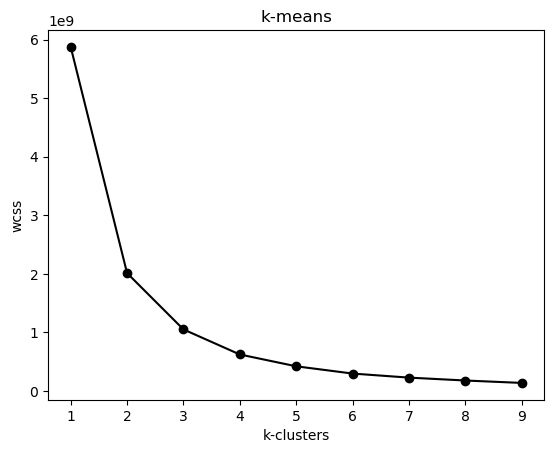

In [17]:
plt.plot(k_clusters,wcss,color="black",marker='o',linestyle='solid')

plt.title("k-means")
plt.xlabel("k-clusters")
plt.ylabel("wcss")
plt.xticks(k_clusters)
plt.show()

9
